# 📦 Import required libraries

In [115]:
import numpy as np
import pandas as pd

# 📥 Load the dataset

In [118]:
df = pd.read_csv("heart.csv")
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# ℹ️ Dataset information

In [121]:
print("Dataset shape:", df.shape)

Dataset shape: (918, 12)


In [123]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


# 📊 Summary statistics

In [126]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


# 🔍 Explore unique values in categorical columns

In [129]:
# Check unique values in object (non-numeric) columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"🟦 Unique values in '{col}':", df[col].unique())


🟦 Unique values in 'Sex': ['M' 'F']
🟦 Unique values in 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
🟦 Unique values in 'RestingECG': ['Normal' 'ST' 'LVH']
🟦 Unique values in 'ExerciseAngina': ['N' 'Y']
🟦 Unique values in 'ST_Slope': ['Up' 'Flat' 'Down']


# 🔁 Check for duplicate rows

In [132]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"🔁 Duplicate Rows: {duplicates}")

🔁 Duplicate Rows: 0


# ⚠️ Check for suspicious (invalid) values

In [135]:

# Check for zero or invalid values in key medical columns
print("\n❗ Suspicious Values (like 0) in important columns:")
print(df[df['RestingBP'] == 0][['Age', 'RestingBP']])
print(df[df['Cholesterol'] == 0][['Age', 'Cholesterol']])



❗ Suspicious Values (like 0) in important columns:
     Age  RestingBP
449   55          0
     Age  Cholesterol
293   65            0
294   32            0
295   61            0
296   50            0
297   57            0
..   ...          ...
514   43            0
515   63            0
518   48            0
535   56            0
536   62            0

[172 rows x 2 columns]


# 🧹 Clean the data
# Drop rows with 0 RestingBP

In [138]:
# Drop row where RestingBP is 0
df = df[df['RestingBP'] != 0]


# Replace 0 Cholesterol with median of non-zero values

In [141]:

# Replace 0 Cholesterol with median of non-zero values
chol_median = df[df['Cholesterol'] != 0]['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, chol_median)

print("✅ Cleaned: Replaced 0 cholesterol & dropped 0 RestingBP row")
print("Updated shape:", df.shape)


✅ Cleaned: Replaced 0 cholesterol & dropped 0 RestingBP row
Updated shape: (917, 12)


# 🔁 Re-check for 0 values

In [144]:
# 1. Confirm there are no 0s in 'Cholesterol' column
zero_chol_count = (df['Cholesterol'] == 0).sum()
print(f"🟠 Cholesterol = 0 values after cleaning: {zero_chol_count}")


🟠 Cholesterol = 0 values after cleaning: 0


# 📊 Updated cholesterol statistics

In [147]:

# 2. Re-check basic stats of Cholesterol
print("\n📊 Updated Cholesterol Summary:")
print(df['Cholesterol'].describe())

# 3. Optionally, print the median we used (again)
chol_median = df['Cholesterol'].median()
print(f"\n🧮 Median Cholesterol used for replacement: {chol_median}")



📊 Updated Cholesterol Summary:
count    917.000000
mean     243.211559
std       53.430044
min       85.000000
25%      214.000000
50%      237.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

🧮 Median Cholesterol used for replacement: 237.0


# 📈 Class distribution visualization

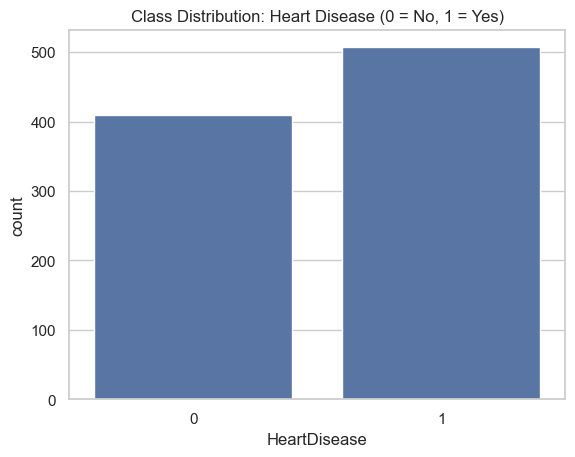


🧮 Class Counts:
HeartDisease
1    507
0    410
Name: count, dtype: int64


In [150]:
# Check class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title("Class Distribution: Heart Disease (0 = No, 1 = Yes)")
plt.show()

print("\n🧮 Class Counts:")
print(df['HeartDisease'].value_counts())


#    Now One Hot Encodding Before Smote Method:

In [153]:
# 1. One-hot encode all categorical variables
df_encoded = pd.get_dummies(df, drop_first=False)

# Optional: check encoding result
print("✅ Encoded columns:", df_encoded.columns.tolist())

# 2. Check for any non-numeric values (debugging aid)
non_numeric = df_encoded.select_dtypes(exclude=['number'])
if not non_numeric.empty:
    print("❌ Still contains non-numeric values:\n", non_numeric.head())
else:
    print("✅ All values are now numeric.")


✅ Encoded columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
❌ Still contains non-numeric values:
    Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0  False   True              False               True              False   
1   True  False              False              False               True   
2  False   True              False               True              False   
3   True  False               True              False              False   
4  False   True              False              False               True   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0             False           False               True          False   
1        

#   Convert Boolean into Numerical:

In [156]:
# Convert all boolean columns to int (0/1)
df_encoded = df_encoded.astype(int)


# ✅ Confirm all numeric values

In [159]:
print(df_encoded.head())
print("✅ All columns types:\n", df_encoded.dtypes)


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172        0             0   
1   49        160          180          0    156        1             1   
2   37        130          283          0     98        0             0   
3   48        138          214          0    108        1             1   
4   54        150          195          0    122        0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_

# 🔝 Cap Cholesterol outliers at 99th percentile

In [162]:
import numpy as np

# Step 1: Calculate the 99th percentile value of Cholesterol
cholesterol_cap = df_encoded["Cholesterol"].quantile(0.99)
print(f"🔍 Capping Cholesterol values above: {cholesterol_cap:.2f}")

# Step 2: Replace values above the cap with the cap value
df_encoded["Cholesterol"] = np.where(
    df_encoded["Cholesterol"] > cholesterol_cap,
    cholesterol_cap,
    df_encoded["Cholesterol"]
)

# Step 3: Confirm it's done
print("✅ Cholesterol capping complete.")
print(df_encoded["Cholesterol"].describe())


🔍 Capping Cholesterol values above: 411.52
✅ Cholesterol capping complete.
count    917.000000
mean     242.327372
std       49.468827
min       85.000000
25%      214.000000
50%      237.000000
75%      267.000000
max      411.520000
Name: Cholesterol, dtype: float64


# 📊 Plot histogram after capping

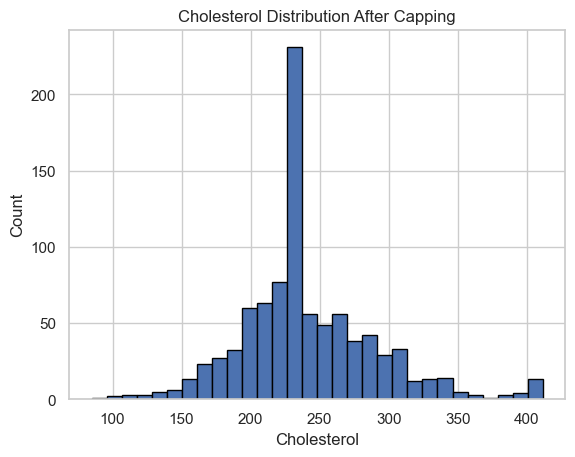

In [165]:
import matplotlib.pyplot as plt

plt.hist(df_encoded["Cholesterol"], bins=30, edgecolor='black')
plt.title("Cholesterol Distribution After Capping")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()


# 🧪 Check class imbalance before SMOTE

In [168]:
# 🎯 Step 1: Confirm class imbalance before SMOTE
print("🎯 Class distribution before SMOTE:")
print(df_encoded["HeartDisease"].value_counts())

🎯 Class distribution before SMOTE:
HeartDisease
1    507
0    410
Name: count, dtype: int64


#  Separate features and target

In [171]:
# 🎯 Step 2: Separate features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# 🔄 Train-test split and apply SMOTE

In [174]:
# 🎯 Step 3: Split into training and testing sets (stratified to preserve class distribution)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#   SMOTE METHOD:

In [177]:

# 🎯 Step 4: Apply SMOTE to training data only (never to test set!)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [179]:
# 🎯 Step 5: Display new class balance after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
HeartDisease
1    405
0    328
Name: count, dtype: int64

After SMOTE:
HeartDisease
1    405
0    405
Name: count, dtype: int64


# 📊 Visualize class distribution before and after SMOTE

C:\Users\Admin\AppData\Local\Temp\ipykernel_11808\1907939768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='coolwarm')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11808\1907939768.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='coolwarm')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11808\1907939768.py:23: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_11808\1907939768.py:23: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\.codegeex\mamba\envs\codegeex-agent\Lib\site-pack

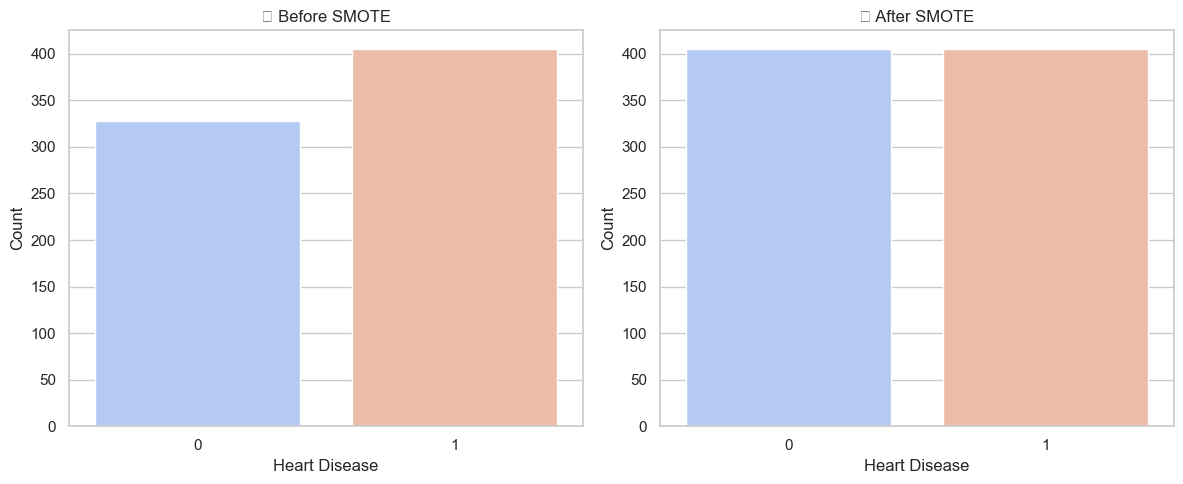

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for consistency
sns.set(style="whitegrid")

# 🔍 Plot class distribution BEFORE SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='coolwarm')
plt.title("🔴 Before SMOTE")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

# 🔍 Plot class distribution AFTER SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette='coolwarm')
plt.title("🟢 After SMOTE")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


#   Histograms for All Numeric Features

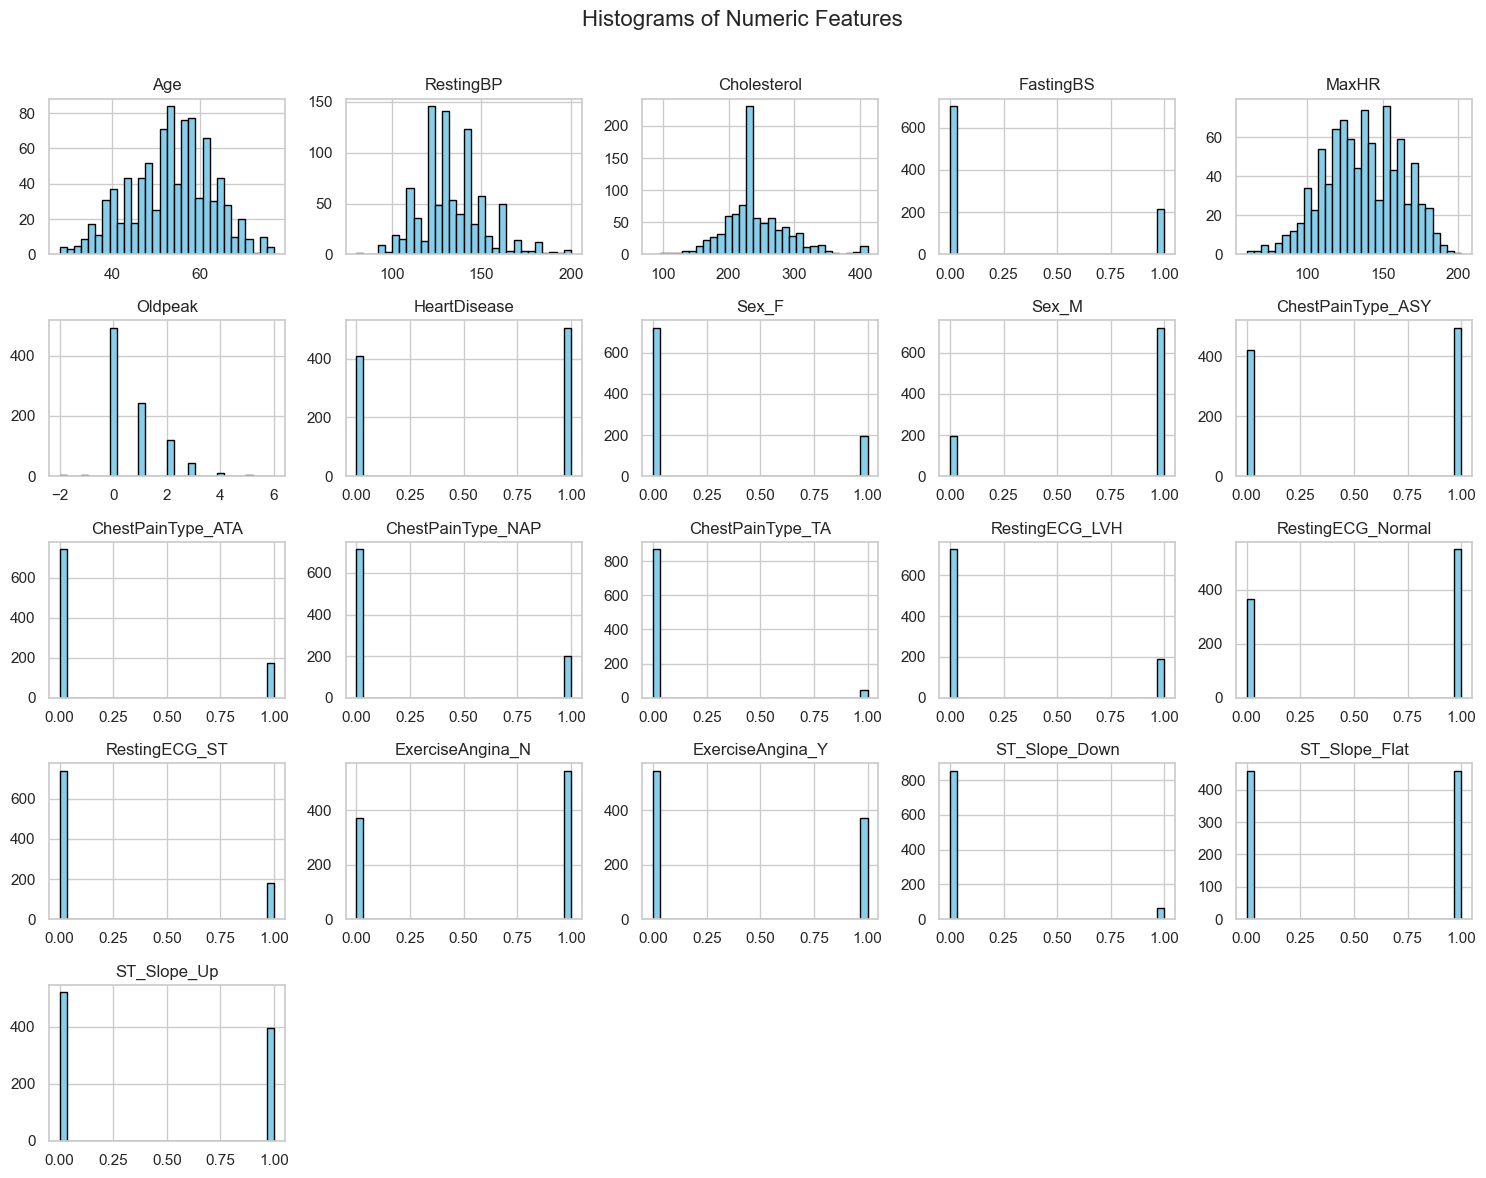

In [185]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns

# Plot histograms
df_encoded[numeric_cols].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [187]:
print("📌 Columns in final dataset:", df_encoded.columns.tolist())
print("✅ Total columns:", len(df_encoded.columns))


📌 Columns in final dataset: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
✅ Total columns: 21


#    🎯 Compare multiple models (LogReg, Random Forest, etc.):

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [192]:
# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)        # Train on SMOTE-balanced data
    y_pred = model.predict(X_test)                 # Predict on untouched test set
    acc = accuracy_score(y_test, y_pred)
    print(f"📌 {name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("─" * 50)


C:\Users\Admin\.codegeex\mamba\envs\codegeex-agent\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Logistic Regression Accuracy: 0.8641
[[70 12]
 [13 89]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

──────────────────────────────────────────────────
📌 Random Forest Accuracy: 0.8967
[[71 11]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

──────────────────────────────────────────────────
📌 Decision Tree Accuracy: 0.8043
[[69 13]
 [23 79]]
              precision    recall  f1-score   support

           0       0.75    

#  Cross-Validation Accuracy (on training data):

In [195]:
best_model = models["Random Forest"]


In [197]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5)
print("✅ Cross-validation accuracies:", cv_scores)
print("✅ Mean accuracy:", round(cv_scores.mean() * 100, 2), "%")


✅ Cross-validation accuracies: [0.82098765 0.90740741 0.88271605 0.80864198 0.91358025]
✅ Mean accuracy: 86.67 %


# 📈 Plot ROC Curve for Random Forest:

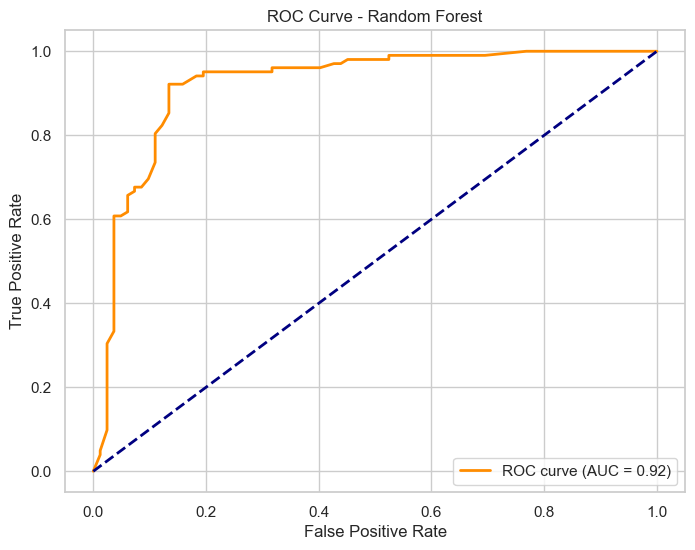

In [199]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 📊 Plot Feature Importance (Random Forest):

C:\Users\Admin\AppData\Local\Temp\ipykernel_11808\587834643.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


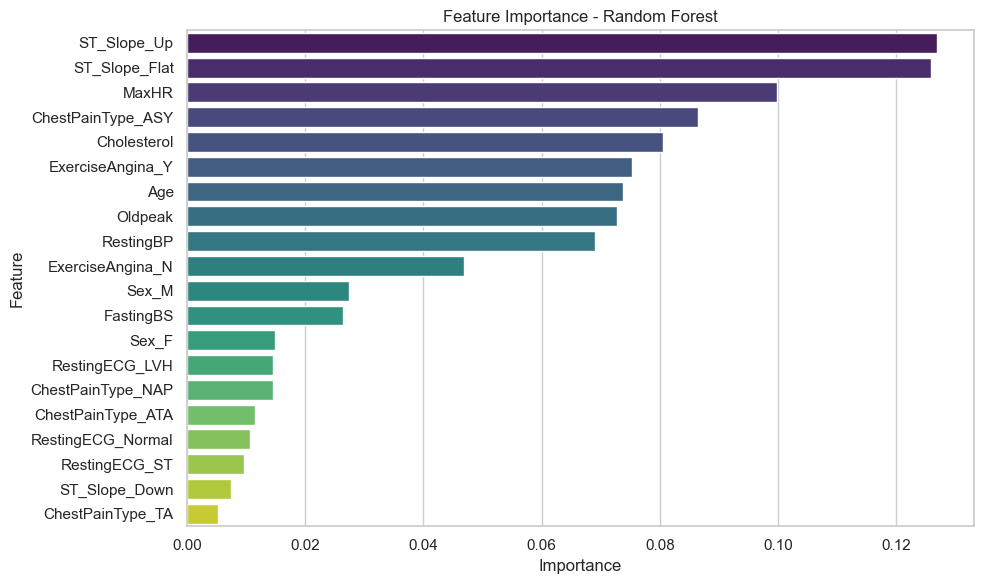

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


# 💾 Save the model

In [206]:
import joblib

# Save the model
joblib.dump(best_model, "random_forest_heart_disease_model.pkl")
print("✅ Model saved as random_forest_heart_disease_model.pkl")


✅ Model saved as random_forest_heart_disease_model.pkl


### 🔄 To Load the Model Later
python
Copy
Edit
#### Load the model
loaded_model = joblib.load("random_forest_heart_disease_model.pkl")

#### Example usage
#### prediction = loaded_model.predict(new_data)

# 🔮 Predict for new patient input

In [210]:
import pandas as pd

# Step 1: Input from user:

# new_patient = {
#     'Age': 54,
#     'RestingBP': 150,
#     'Cholesterol': 195,
#     'FastingBS': 0,
#     'MaxHR': 122,
#     'Oldpeak': 0,
#     'Sex': 'M',
#     'ChestPainType': 'NAP',
#     'RestingECG': 'Normal',
#     'ExerciseAngina': 'N',
#     'ST_Slope': 'Up'
# }

new_patient = {
    'Age': 67,
    'RestingBP': 160,
    'Cholesterol': 310,
    'FastingBS': 1,
    'MaxHR': 90,
    'Oldpeak': 3.5,
    'Sex': 'M',
    'ChestPainType': 'ASY',
    'RestingECG': 'ST',
    'ExerciseAngina': 'Y',
    'ST_Slope': 'Flat'
}

# Step 2: Convert to DataFrame
patient_df = pd.DataFrame([new_patient])

# Step 3: One-hot encoding
encoded_patient = pd.get_dummies(patient_df)

# Step 4: Align columns with training data
# Replace `X_train.columns` with your training feature names if saved separately
encoded_patient = encoded_patient.reindex(columns=X_train.columns, fill_value=0)

# Step 5: Predict using best model
prediction = best_model.predict(encoded_patient)[0]

# Step 6: Output result
if prediction == 1:
    print("🩺 Prediction: 🚨 High risk of heart disease.")
else:
    print("🩺 Prediction: ✅ Low risk of heart disease.")


🩺 Prediction: 🚨 High risk of heart disease.
